<a href="https://colab.research.google.com/github/wrichard84/data201/blob/main/Capstone_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE DATA**

In [78]:
from google.colab import files
uploaded = files.upload()

Saving Citi_Bike_Summer_2021.csv to Citi_Bike_Summer_2021 (1).csv


In [79]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Citi_Bike_Summer_2021.csv']))

In [80]:
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
%matplotlib inline

**EXPLORING THE DATA**

In [81]:
df.head()

,Month,Year,ride_id,Bike Type,Date_Started,Date_Ended,Time_Started,Time_Ended,Trip Duration hh:mm,From_Station,To_Station,Member Type
0,June,2021,6457BC38526A4187,Docked,21-Jun-21,21-Jun-21,10:19:04 AM,10:26:28 AM,0:07,Lafayette Park,City Hall,Member
1,June,2021,508AC0C37B2BE1A8,Docked,5-Jun-21,5-Jun-21,10:12:18 AM,10:27:10 AM,0:14,Mama Johnson Field - 4 St & Jackson St,Bloomfield St & 15 St,Member
2,June,2021,A1AD52779E13308C,Docked,4-Jun-21,4-Jun-21,3:42:35 AM,3:54:28 AM,0:11,Lincoln Park,Grand St,Member
3,June,2021,DA8AA7083ACCA940,Docked,3-Jun-21,3-Jun-21,6:07:42 AM,7:09:26 AM,1:01,Columbus Park - Clinton St & 9 St,Columbus Park - Clinton St & 9 St,Non-Member
4,June,2021,BF8DB08AEF78C8D1,Docked,5-Jun-21,5-Jun-21,3:39:56 AM,4:16:09 AM,0:36,Columbus Park - Clinton St & 9 St,Columbus Park - Clinton St & 9 St,Non-Member


In [82]:
df.columns

Index(['Month', 'Year', 'ride_id', 'Bike Type', 'Date_Started', 'Date_Ended',
       'Time_Started', 'Time_Ended', 'Trip Duration hh:mm', 'From_Station',
       'To_Station', 'Member Type'],
      dtype='object')

In [83]:
df["Month"].unique()

array(['June', 'July', 'August'], dtype=object)

In [84]:
df.shape

(247777, 12)

**Question 1: What did overall ridership look like over the Summer?**

In [85]:
#Setting Index as Month so I can find details about each month
df_month_index = df.set_index("Month")

In [86]:
df_june = df_month_index.loc["June"]
df_july = df_month_index.loc["July"]
df_august = df_month_index.loc["August"]

In [87]:
#Finding count of rides in June, July & August
df_june["ride_id"].count()

71428

In [88]:
df_july["ride_id"].count()

82549

In [89]:
df_august["ride_id"].count()

93800

In [90]:
#Finding what the breakout percentage-wise of rides was for each month
df_Month_Percent = df["Month"].value_counts(normalize=True)
print(df_Month_Percent)

August    0.378566
July      0.333158
June      0.288275
Name: Month, dtype: float64


([<matplotlib.patches.Wedge at 0x7f06ba8eb990>,
 [Text(-2.0418389981238794, 0.8190808908407488, 'August'),
  Text(0.6157047980464649, -2.1120860781849213, 'July'),
  Text(1.731016907420168, 1.357785132569037, 'June')],
 [Text(-1.1137303626130248, 0.4467713950040448, '38%'),
  Text(0.3358389807526172, -1.1520469517372298, '33%'),
  Text(0.9441910404110007, 0.7406100723103838, '29%')])

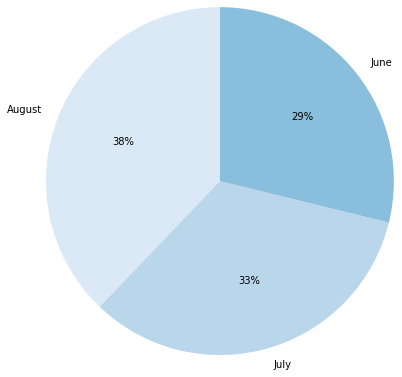

In [91]:
#Creating pie chart showing percentage breakout of rides by month
data = [0.378566, 0.333158, 0.288275]
labels = ['August', 'July', 'June']
colors = sns.color_palette('Blues')
plot.pie(data, labels = labels, colors = colors, startangle = 90, autopct='%.0f%%', radius=2)

In [92]:
#Creating a new dataframe of the monthly ride counts
dict_month_counts = {"Month" : ["June", "July", "August"],
                     "Number of Trips" : [71428, 82549, 93800]}

In [93]:
df_month_counts = pd.DataFrame(dict_month_counts)

In [94]:
print(df_month_counts)

    Month  Number of Trips
0    June            71428
1    July            82549
2  August            93800


[Text(0.5, 1.0, 'Total Rides by Month')]

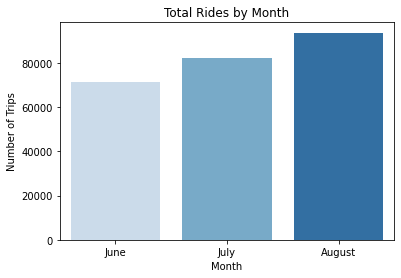

In [95]:
sns.barplot(x="Month", y= "Number of Trips", data=df_month_counts, palette = "Blues").set(title="Total Rides by Month")

In [96]:
#Finding the month over month percent change from beginning of Summer (June) to the end (August)
df_percent_change = df_month_counts.set_index("Month")
j, a = df_percent_change.iloc[0], df_percent_change.iloc[-1]
df_percent_change = df_percent_change.append(((a/j)-1).rename('June_Aug_PercChng'))
print(df_percent_change)

                   Number of Trips
Month                             
June                  71428.000000
July                  82549.000000
August                93800.000000
June_Aug_PercChng         0.313211


In [97]:
#Finding the month over month percent change
df_percent_change.pct_change()

,Number of Trips
Month,
June,NaN
July,0.155695
August,0.136295
June_Aug_PercChng,-0.999997


**In terms of Summer ridership, August saw the greatest number of unique rides taken (93,800 or 38% of total ridership) which was a 31% increase from the beginning of the summer (June). Ridership increased each month, up ~16% from June to July, and up ~14% from July to August.**

In [115]:
#Converting the data type for "Date Started" and "Date Ended" columns from Object/String to DateTime
df['Date_Started'] = pd.to_datetime(df["Date_Started"], format="%d-%b-%y")
df["Date_Ended"] = pd.to_datetime(df["Date_Ended"], format="%d-%b-%y")

In [152]:
#Finding the highest number of rides and lowest number of rides per day
date_pivot = df.pivot_table(values="ride_id", index="Date_Started", aggfunc=pd.Series.nunique)
print(date_pivot.max())
print(date_pivot.min())

ride_id    3725
dtype: int64
ride_id    395
dtype: int64


([<matplotlib.axis.XTick object at 0x7f06b7ae9990>, <matplotlib.axis.XTick object at 0x7f06b7ae9490>, <matplotlib.axis.XTick object at 0x7f06b7ae2790>, <matplotlib.axis.XTick object at 0x7f06b77e2390>, <matplotlib.axis.XTick object at 0x7f06b7533f50>, <matplotlib.axis.XTick object at 0x7f06b7aaa490>, <matplotlib.axis.XTick object at 0x7f06b77f9910>, <matplotlib.axis.XTick object at 0x7f06b730db50>, <matplotlib.axis.XTick object at 0x7f06b75193d0>, <matplotlib.axis.XTick object at 0x7f06b7519a10>, <matplotlib.axis.XTick object at 0x7f06b7519b50>, <matplotlib.axis.XTick object at 0x7f06bd879650>, <matplotlib.axis.XTick object at 0x7f06b7852e90>, <matplotlib.axis.XTick object at 0x7f06b7348b10>, <matplotlib.axis.XTick object at 0x7f06b7348fd0>, <matplotlib.axis.XTick object at 0x7f06b77f95d0>, <matplotlib.axis.XTick object at 0x7f06b7aaad10>, <matplotlib.axis.XTick object at 0x7f06b732b490>, <matplotlib.axis.XTick object at 0x7f06b7858a10>, <matplotlib.axis.XTick object at 0x7f06b7855410>

Text(0.5, 1.0, 'Daily Rides')

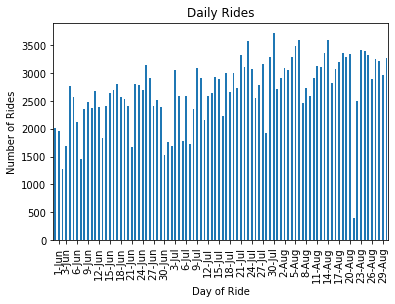

In [144]:
#Creating pivot table of count of rides (ride_id) by Date_Started and then creating a bar graph of the results
date_pivot = df.pivot_table(values="ride_id", index="Date_Started", aggfunc=pd.Series.nunique)
date_pivot.plot(kind="bar", legend=None)
print(plot.xticks([1, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90], ["1-Jun", "3-Jun", "6-Jun", "9-Jun", "12-Jun", "15-Jun", "18-Jun", "21-Jun", "24-Jun", "27-Jun", "30-Jun", "3-Jul", "6-Jul", "9-Jul", "12-Jul", "15-Jul", "18-Jul", "21-Jul", "24-Jul", "27-Jul", "30-Jul", "2-Aug", "5-Aug", "8-Aug", "11-Aug", "14-Aug", "17-Aug", "20-Aug", "23-Aug", "26-Aug", "29-Aug"]))
plot.xlabel("Day of Ride")
plot.ylabel("Number of Rides")
plot.title("Daily Rides")

**The lowest number of rides (395) looks to have come around August 21st or 22nd. The highest number of rides (3,725) looks to have come around July 31st**

In [102]:
#Finding the top TO destination
df_to_station = df.groupby("To_Station")["ride_id"].count()
df_to_station.sort_values(ascending=False)

To_Station
South Waterfront Walkway - Sinatra Dr & 1 St    13962
Hoboken Terminal - Hudson St & Hudson Pl        11535
Grove St PATH                                   10331
Newport Pkwy                                     8489
Hamilton Park                                    6810
                                                ...  
W 31 St & 7 Ave                                     1
Reade St & Broadway                                 1
W 35 St & Dyer Ave                                  1
Broadway & W 160 St                                 1
1 Ave & E 6 St                                      1
Name: ride_id, Length: 170, dtype: int64

**South Waterfront Walkway - Sinatra Dr & 1st was the highest destination station from June throuhg August (13,962 trips)**

In [103]:
#Finding the top FROM destination
df_from_station = df.groupby("From_Station")["ride_id"].count()
df_from_station.sort_values(ascending=False)

From_Station
South Waterfront Walkway - Sinatra Dr & 1 St    13890
Hoboken Terminal - Hudson St & Hudson Pl        11361
Grove St PATH                                    9890
Newport Pkwy                                     8500
Hamilton Park                                    6794
                                                ...  
Jackson Square                                    676
2 St HBLR - 2 St & Marshall St                    516
Bergen Ave & Stegman St                           322
Grant Ave & MLK Dr                                113
JCBS Depot                                          2
Name: ride_id, Length: 78, dtype: int64

**South Waterfront Walkway - Sinatra Dr & 1st was the highest FROM station for Member and Non-Member trips combined (13,890 trips)**

**EXPLORING MEMBER TYPE DATA**

**Question 2: How did ridership differ between Members and Non-Members?**

In [98]:
#Finding the count of rides by member type
Member_Rides = df[df["Member Type"] == "Member"].count()
Non_Member_Rides = df[df["Member Type"] == "Non-Member"].count()
print(Member_Rides)
print(Non_Member_Rides)


Month                  119913
Year                   119913
ride_id                119913
Bike Type              119913
Date_Started           119913
Date_Ended             119913
Time_Started           119913
Time_Ended             119913
Trip Duration hh:mm    119913
From_Station           119913
To_Station             119358
Member Type            119913
dtype: int64
Month                  127864
Year                   127864
ride_id                127864
Bike Type              127864
Date_Started           127864
Date_Ended             127864
Time_Started           127864
Time_Ended             127864
Trip Duration hh:mm    127864
From_Station           127864
To_Station             127121
Member Type            127864
dtype: int64


In [99]:
df.shape

(247777, 12)

In [100]:
#Finding percent of total rides breakout by member type
member_trips = 119913
nonmember_trips = 127864
total_trips = 247777
total_trips_member_perct = member_trips/total_trips
total_trips_nonmember_perct = nonmember_trips/total_trips
print(total_trips_member_perct)
print(total_trips_nonmember_perct)

0.48395533080148684
0.5160446691985132


**Citi Bike Members took 119,913 rides from June to August while Non-Members took 127,864 rides**

In [101]:
df.columns

Index(['Month', 'Year', 'ride_id', 'Bike Type', 'Date_Started', 'Date_Ended',
       'Time_Started', 'Time_Ended', 'Trip Duration hh:mm', 'From_Station',
       'To_Station', 'Member Type'],
      dtype='object')

In [104]:
#Setting Index as Member Type so I can subset
df_member_index = df.set_index("Member Type")

In [105]:
#Looking for the Top 3 "To Stations" for Members
df_Members = df_member_index.loc["Member"]
df_Members_To_Station = df_Members.groupby("To_Station")["ride_id"].count()
df_Members_To_Station.sort_values(ascending=False)

To_Station
Grove St PATH                                   6899
Hoboken Terminal - Hudson St & Hudson Pl        4812
South Waterfront Walkway - Sinatra Dr & 1 St    4110
Newport Pkwy                                    4072
Hamilton Park                                   3978
                                                ... 
Schermerhorn St & Court St                         1
South St & Gouverneur Ln                           1
St Marks Pl & 1 Ave                                1
Broadway & W 155 St                                1
1 Ave & E 6 St                                     1
Name: ride_id, Length: 132, dtype: int64

**Top 3 "To Station" for Members are:**


**1.   Grove St Path (6,899)**

**2.   Hoboken Terminal - Hudson St & Hudson Pl (4,812)**

**3.   South Waterfront Walkway - Sinatra Dr & 1 St (4,110)**



In [106]:
#Looking for the Top 3 "To Stations" for Non-Members
df_NonMembers = df_member_index.loc["Non-Member"]
df_NonMembers_To_Station = df_NonMembers.groupby("To_Station")["ride_id"].count()
df_NonMembers_To_Station.sort_values(ascending=False)

To_Station
South Waterfront Walkway - Sinatra Dr & 1 St    9852
Hoboken Terminal - Hudson St & Hudson Pl        6723
14 St Ferry - 14 St & Shipyard Ln               4446
Newport Pkwy                                    4417
11 St & Washington St                           4068
                                                ... 
W 181 St & Riverside Dr                            1
E 88 St & Park Ave                                 1
Schermerhorn St & Court St                         1
Fort Washington Ave & W 183 St                     1
10 Ave & W 14 St                                   1
Name: ride_id, Length: 129, dtype: int64

**Top 3 "To Station" for Non-Members are:**


**1.   South Waterfront Walkway - Sinatra Dr & 1 St (9,852)**

**2.   Hoboken Terminal - Hudson St & Hudson Pl (6,723)**

**3.   14 St Ferry - 14 St & Shipyard Ln (4,446)**

In [107]:
#Finding percent of total trips taken to the top TO destination by member type
member = 4110
non_member = 9852
total = 13962
member_to_station_perct = member/total
nonmember_to_station_perct = non_member/total
print(member_to_station_perct)
print(nonmember_to_station_perct)

0.2943704340352385
0.7056295659647615


In [108]:
#Looking for the Top 3 "From Stations" for Members
df_Members = df_member_index.loc["Member"]
df_Members_From_Station = df_Members.groupby("From_Station")["ride_id"].count()
df_Members_From_Station.sort_values(ascending=False)

From_Station
Grove St PATH                                   6547
Hoboken Terminal - Hudson St & Hudson Pl        4865
South Waterfront Walkway - Sinatra Dr & 1 St    4391
Hamilton Park                                   4067
Newport Pkwy                                    4034
                                                ... 
2 St HBLR - 2 St & Marshall St                   210
Union St                                         198
Bergen Ave & Stegman St                           52
Grant Ave & MLK Dr                                27
JCBS Depot                                         2
Name: ride_id, Length: 78, dtype: int64

**Top 3 "From Station" for Members are:**


**1.   Grove St Path (6,547)**

**2.   Hoboken Terminal - Hudson St & Hudson Pl (4,865)**

**3.   South Waterfront Walkway - Sinatra Dr & 1 St (4,391)**

In [109]:
#Looking for the Top 3 "From Stations" for Non-Members
df_NonMembers = df_member_index.loc["Non-Member"]
df_NonMembers_From_Station = df_NonMembers.groupby("From_Station")["ride_id"].count()
df_NonMembers_From_Station.sort_values(ascending=False)

From_Station
South Waterfront Walkway - Sinatra Dr & 1 St    9499
Hoboken Terminal - Hudson St & Hudson Pl        6496
Newport Pkwy                                    4466
14 St Ferry - 14 St & Shipyard Ln               4357
11 St & Washington St                           4114
                                                ... 
2 St HBLR - 2 St & Marshall St                   306
Glenwood Ave                                     298
Bergen Ave & Stegman St                          270
Dey St                                           265
Grant Ave & MLK Dr                                86
Name: ride_id, Length: 77, dtype: int64

**Top 3 "From Station" for Non-Members are:**


**1.   South Waterfront Walkway - Sinatra Dr & 1 St (9,499)**

**2.   Hoboken Terminal - Hudson St & Hudson Pl (6,496)**

**3.   Newport Pkwy (4,466)**

In [110]:
#Finding percent of total trips taken to the top FROM destination by member type
member = 4110
non_member = 9852
total = 13962
member_to_station_perct = member/total
nonmember_to_station_perct = non_member/total
print(member_to_station_perct)
print(nonmember_to_station_perct)

0.2943704340352385
0.7056295659647615


In [111]:
#Finding how many rides were between Members and Non-Members by Month
df_membertype_month = df.groupby(["Member Type", "Month"])["ride_id"].count()
print(df_membertype_month)

Member Type  Month 
Member       August    41031
             July      41540
             June      37342
Non-Member   August    52769
             July      41009
             June      34086
Name: ride_id, dtype: int64


In [112]:
#Creating a new dataframe of the breakout of rides per month by member type
df_rides_by_membertype_month = pd.DataFrame({'Member Type': ['Member', 'Member', 'Member', 'Non-Member', 'Non-Member', 'Non-Member'],
                   'Month': ['August', 'July', 'June', 'August', 'July', 'June'],
                   'Rides': [41031, 41540, 37342, 52769, 41009, 34086]})
print(df_rides_by_membertype_month)

  Member Type   Month  Rides
0      Member  August  41031
1      Member    July  41540
2      Member    June  37342
3  Non-Member  August  52769
4  Non-Member    July  41009
5  Non-Member    June  34086


Text(0.5, 1.0, 'Member Type Rides by Month')

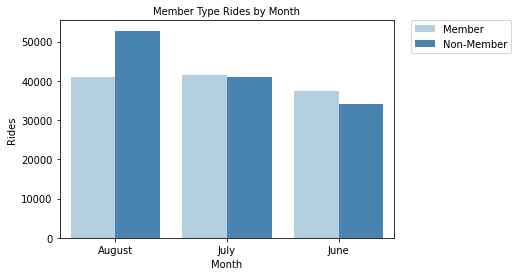

In [113]:
p = sns.barplot(x="Month", y="Rides", hue="Member Type", palette="Blues", data=df_rides_by_membertype_month)
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plot.title('Member Type Rides by Month', fontsize=10)

**More Non-Members took rides in August, however Members edged out Non-Members in terms of ride count in June and July**

In [114]:
df.columns

Index(['Month', 'Year', 'ride_id', 'Bike Type', 'Date_Started', 'Date_Ended',
       'Time_Started', 'Time_Ended', 'Trip Duration hh:mm', 'From_Station',
       'To_Station', 'Member Type'],
      dtype='object')

In [176]:
#Creating pivot table of count of rides (ride_id) by Date_Started and Member Type 
membertype_date_pivot = df.pivot_table(values="ride_id", index="Date_Started", columns="Member Type", aggfunc=pd.Series.nunique)
print(membertype_date_pivot["Member"].max())
print(membertype_date_pivot["Non-Member"].max())
print(membertype_date_pivot["Member"].min())
print(membertype_date_pivot["Non-Member"].min())

1717
2488
111
284


(array([18779, 18809, 18840, 18870]), <a list of 4 Text major ticklabel objects>)


Text(0.5, 1.0, 'Daily Rides')

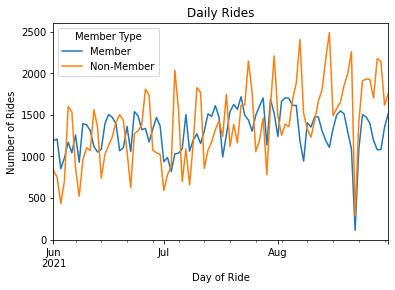

In [175]:
membertype_date_pivot = df.pivot_table(values="ride_id", index="Date_Started", columns="Member Type", aggfunc=pd.Series.nunique)
date_pivot.plot(kind="line")
print(plot.xticks())
plot.xlabel("Day of Ride")
plot.ylabel("Number of Rides")
plot.title("Daily Rides")

**Summary: Overall ridership increased throughout the Summer months, peaking in August, and although total rides were split evenly between Members and Non-Members, there was a spike in Non-Member usage in August, more than likey in line with an increase in late Summer tourism.**

**Suggestions: Citi Bike could benefit from running an awareness or discount campaign at the beginning of Summer 2022 to increase ridership earlier on. They should also consider adding more docks or another station within the vacinity of South Waterfront Walkway to take advantage of the foot traffic in this area. Finally, they should consider partnering with coffee shops, restaurants, and hotels near the top traffiked stations, especially around the end of the Summer, to build awarenss among late Summer tourists, and offer membership incentives (free coffee, discounts, etc. for Citi Bike Members) to encourage convertion of local Non-Members who may be more inclined to use the bikes after taking the PATH train to and from the city.**